# Basic NN autoencoder

Compresion y descompresion de imagenes.

- Reduccion de dimensionalidad
- Compresion de data
- Deteccion de anomalias.
- Eliminacion de ruido (image denoising)
- Generacion de imagenes.
- Separar partes de imagenes para sacar detalles de la imagen, tamano de lo que se observa, etc...

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon.view(-1, 1, 28, 28)


100.0%
100.0%
100.0%
100.0%


Epoch [1/10], Loss: 0.0515
Epoch [2/10], Loss: 0.0438
Epoch [3/10], Loss: 0.0402
Epoch [4/10], Loss: 0.0370
Epoch [5/10], Loss: 0.0381
Epoch [6/10], Loss: 0.0366
Epoch [7/10], Loss: 0.0355
Epoch [8/10], Loss: 0.0353
Epoch [9/10], Loss: 0.0361
Epoch [10/10], Loss: 0.0377


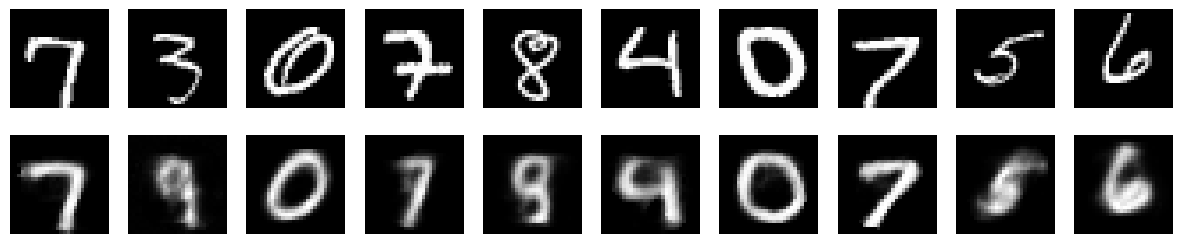

In [4]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        imgs, _ = data
        imgs = imgs.to(device)
        
        # Forward
        outputs = model(imgs)
        loss = criterion(outputs, imgs)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Visualize some reconstructions
def show_images(imgs, reconstructions):
    imgs = imgs.view(-1, 28, 28).cpu().detach()
    reconstructions = reconstructions.view(-1, 28, 28).cpu().detach()
    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axes[0, i].imshow(imgs[i], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructions[i], cmap='gray')
        axes[1, i].axis('off')
    plt.show()

# Run inference
sample_imgs, _ = next(iter(train_loader))
sample_imgs = sample_imgs.to(device)
reconstructions = model(sample_imgs)
show_images(sample_imgs, reconstructions)